<h1 style="font-size: 50px; color:#b300b3;text-align: center;
">Gender Classification</h1>

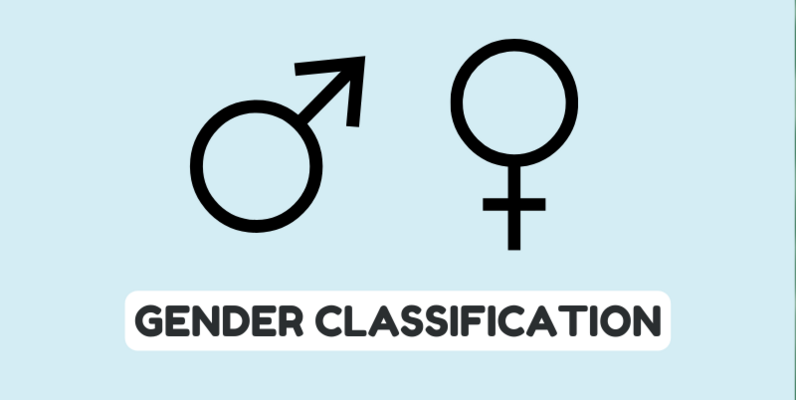

While I was practicing machine learning, I wanted to create a dataset that is closely aligned to the real world scenario and gives better results to whet my appetite on this domain This data set provides simple way to classify the gender with some of the given 7 features that are

1)long_hair - This column contains 0's and 1's where 1 is "long hair" and 0 is"not longhair".
2)forehead_width_cm - This column is in CM's. This is the width of the forehead.
3)forehead_height_cm - This is the height of the forehead and it's in Cm's.
4)nose_wide - This column contains 0's and 1's where 1 is "wide nose" and 0 is "not wide nose".
5)nose_long - This column contains 0's and 1's where 1 is "Long nose" and 0 is "not long nose".
6)lips_thin - This column contains 0's and 1's where 1 represents the "thin lips" while 0 is "Not thin lips".
7)distance_nose_to_lip_long - This column contains 0's and 1's where 1 represents the "long distance between nose and lips" while 0 is "short distance between nose and lips".

from these features i want to predict that the gender is male or female

### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import klib as k
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn import metrics
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score, roc_curve
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier,HistGradientBoostingClassifier

### Loading Dataset

In [2]:
df=pd.read_csv('./gender_classification_v7.csv')
df

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female
...,...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0,Female
4997,1,11.9,5.4,0,0,0,0,Female
4998,1,12.9,5.7,0,0,0,0,Female
4999,1,13.2,6.2,0,0,0,0,Female


### finding the data type of the columns

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB


### Finding the statistical measures from the dataset

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
long_hair,5001.0,0.869626,0.336748,0.0,1.0,1.0,1.0,1.0
forehead_width_cm,5001.0,13.181484,1.107128,11.4,12.2,13.1,14.0,15.5
forehead_height_cm,5001.0,5.946311,0.541268,5.1,5.5,5.9,6.4,7.1
nose_wide,5001.0,0.493901,0.500013,0.0,0.0,0.0,1.0,1.0
nose_long,5001.0,0.507898,0.499988,0.0,0.0,1.0,1.0,1.0
lips_thin,5001.0,0.493101,0.500002,0.0,0.0,0.0,1.0,1.0
distance_nose_to_lip_long,5001.0,0.498900,0.500049,0.0,0.0,0.0,1.0,1.0


### checking wheather  there is any values are present in the dataset

In [5]:
df.isnull().sum()

long_hair                    0
forehead_width_cm            0
forehead_height_cm           0
nose_wide                    0
nose_long                    0
lips_thin                    0
distance_nose_to_lip_long    0
gender                       0
dtype: int64

<h1 style="font-size: 35px; color:#80002a;text-align: center;
">EXPLORATORY DATA ANALYSIS</h1>

<h1 style="font-size: 25px; color:#000000;text-align: center;
">BIVARIATE ANALYSIS</h1>

### plotting line plot for calculating How is forehead_height_cm related with gender calculation

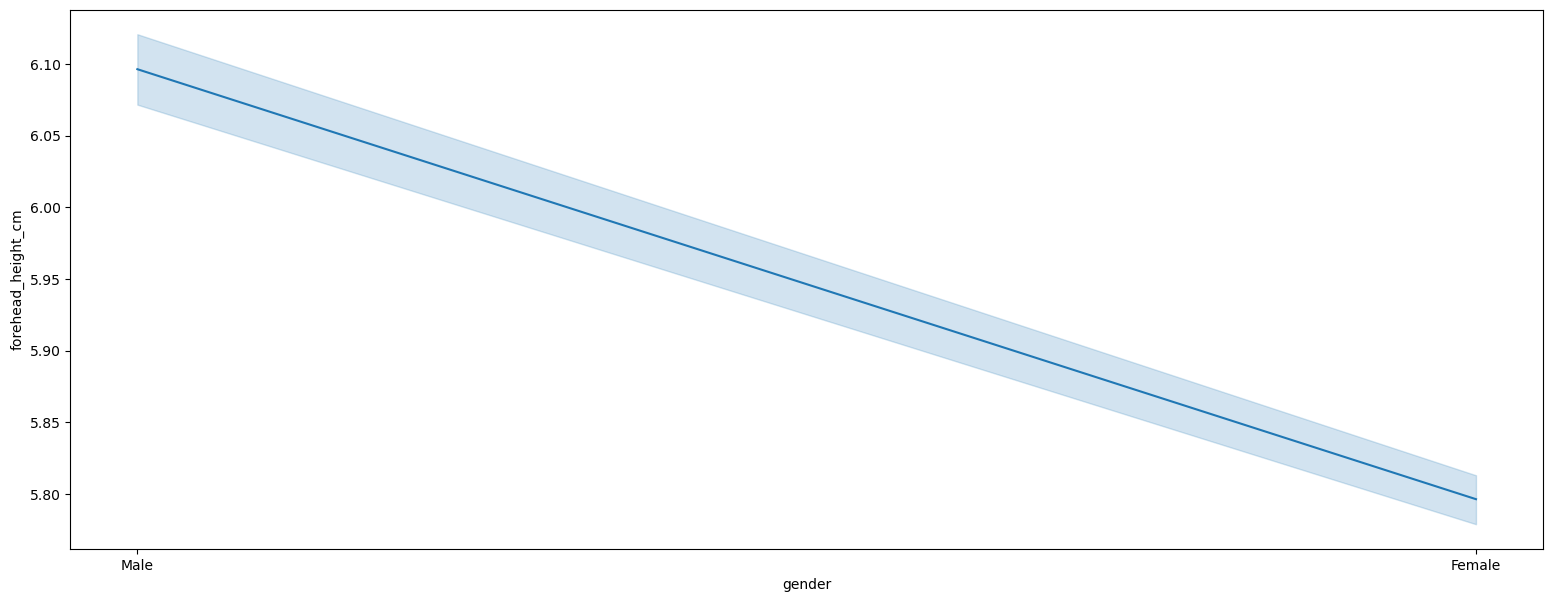

In [6]:
plt.figure(figsize=(19,7))
sns.lineplot(x='gender',y='forehead_height_cm', data=df)
plt.show()

### From the lineplot it is found that Male gender have higer forehead height compared to female

## pie plot & barplot showing which gender have more wider nose

<AxesSubplot:ylabel='nose_wide'>

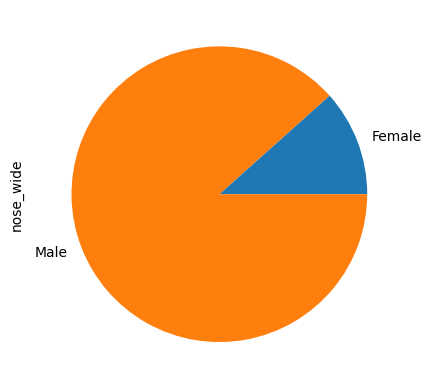

In [7]:
gender_nosewide=df.groupby(['gender'])['nose_wide'].sum()
gender_nosewide.plot.pie()

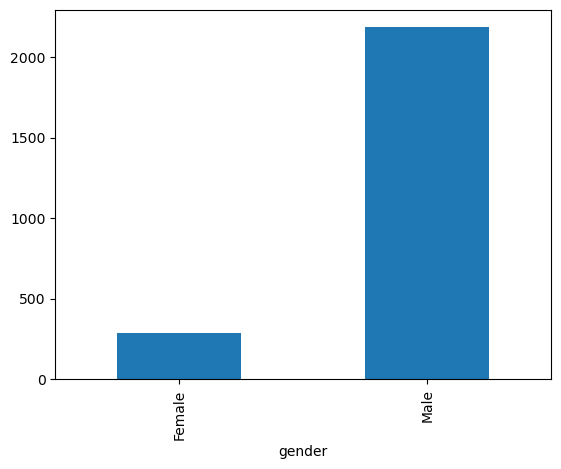

In [8]:
gender_nosewide.plot.bar();

### Both the plots showing that Male gender have more wider nose than the female

## count plot showing gender wise comaprison with long nose

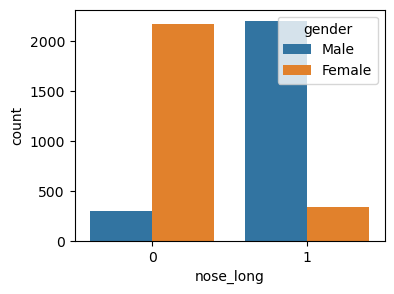

In [9]:
plt.figure(figsize=(4,3))
sns.countplot('nose_long',hue='gender',data=df)
plt.show()

## factorplot showing how is distance nose to lip long and lips thin is related with the gender

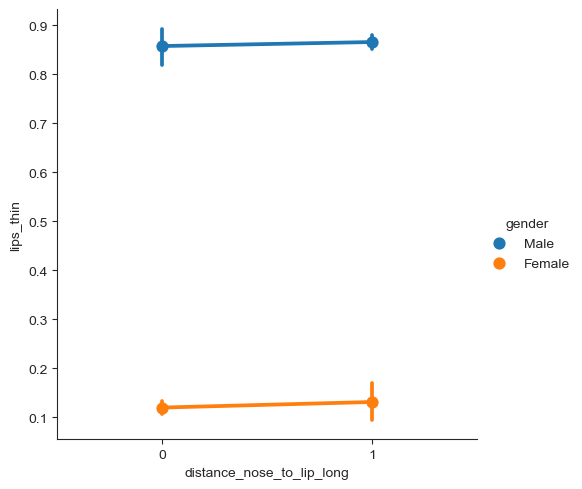

In [10]:
sns.set_style('ticks')
sns.factorplot('distance_nose_to_lip_long','lips_thin',hue='gender',data=df)
plt.show()

## plotting pair plot with the dataset

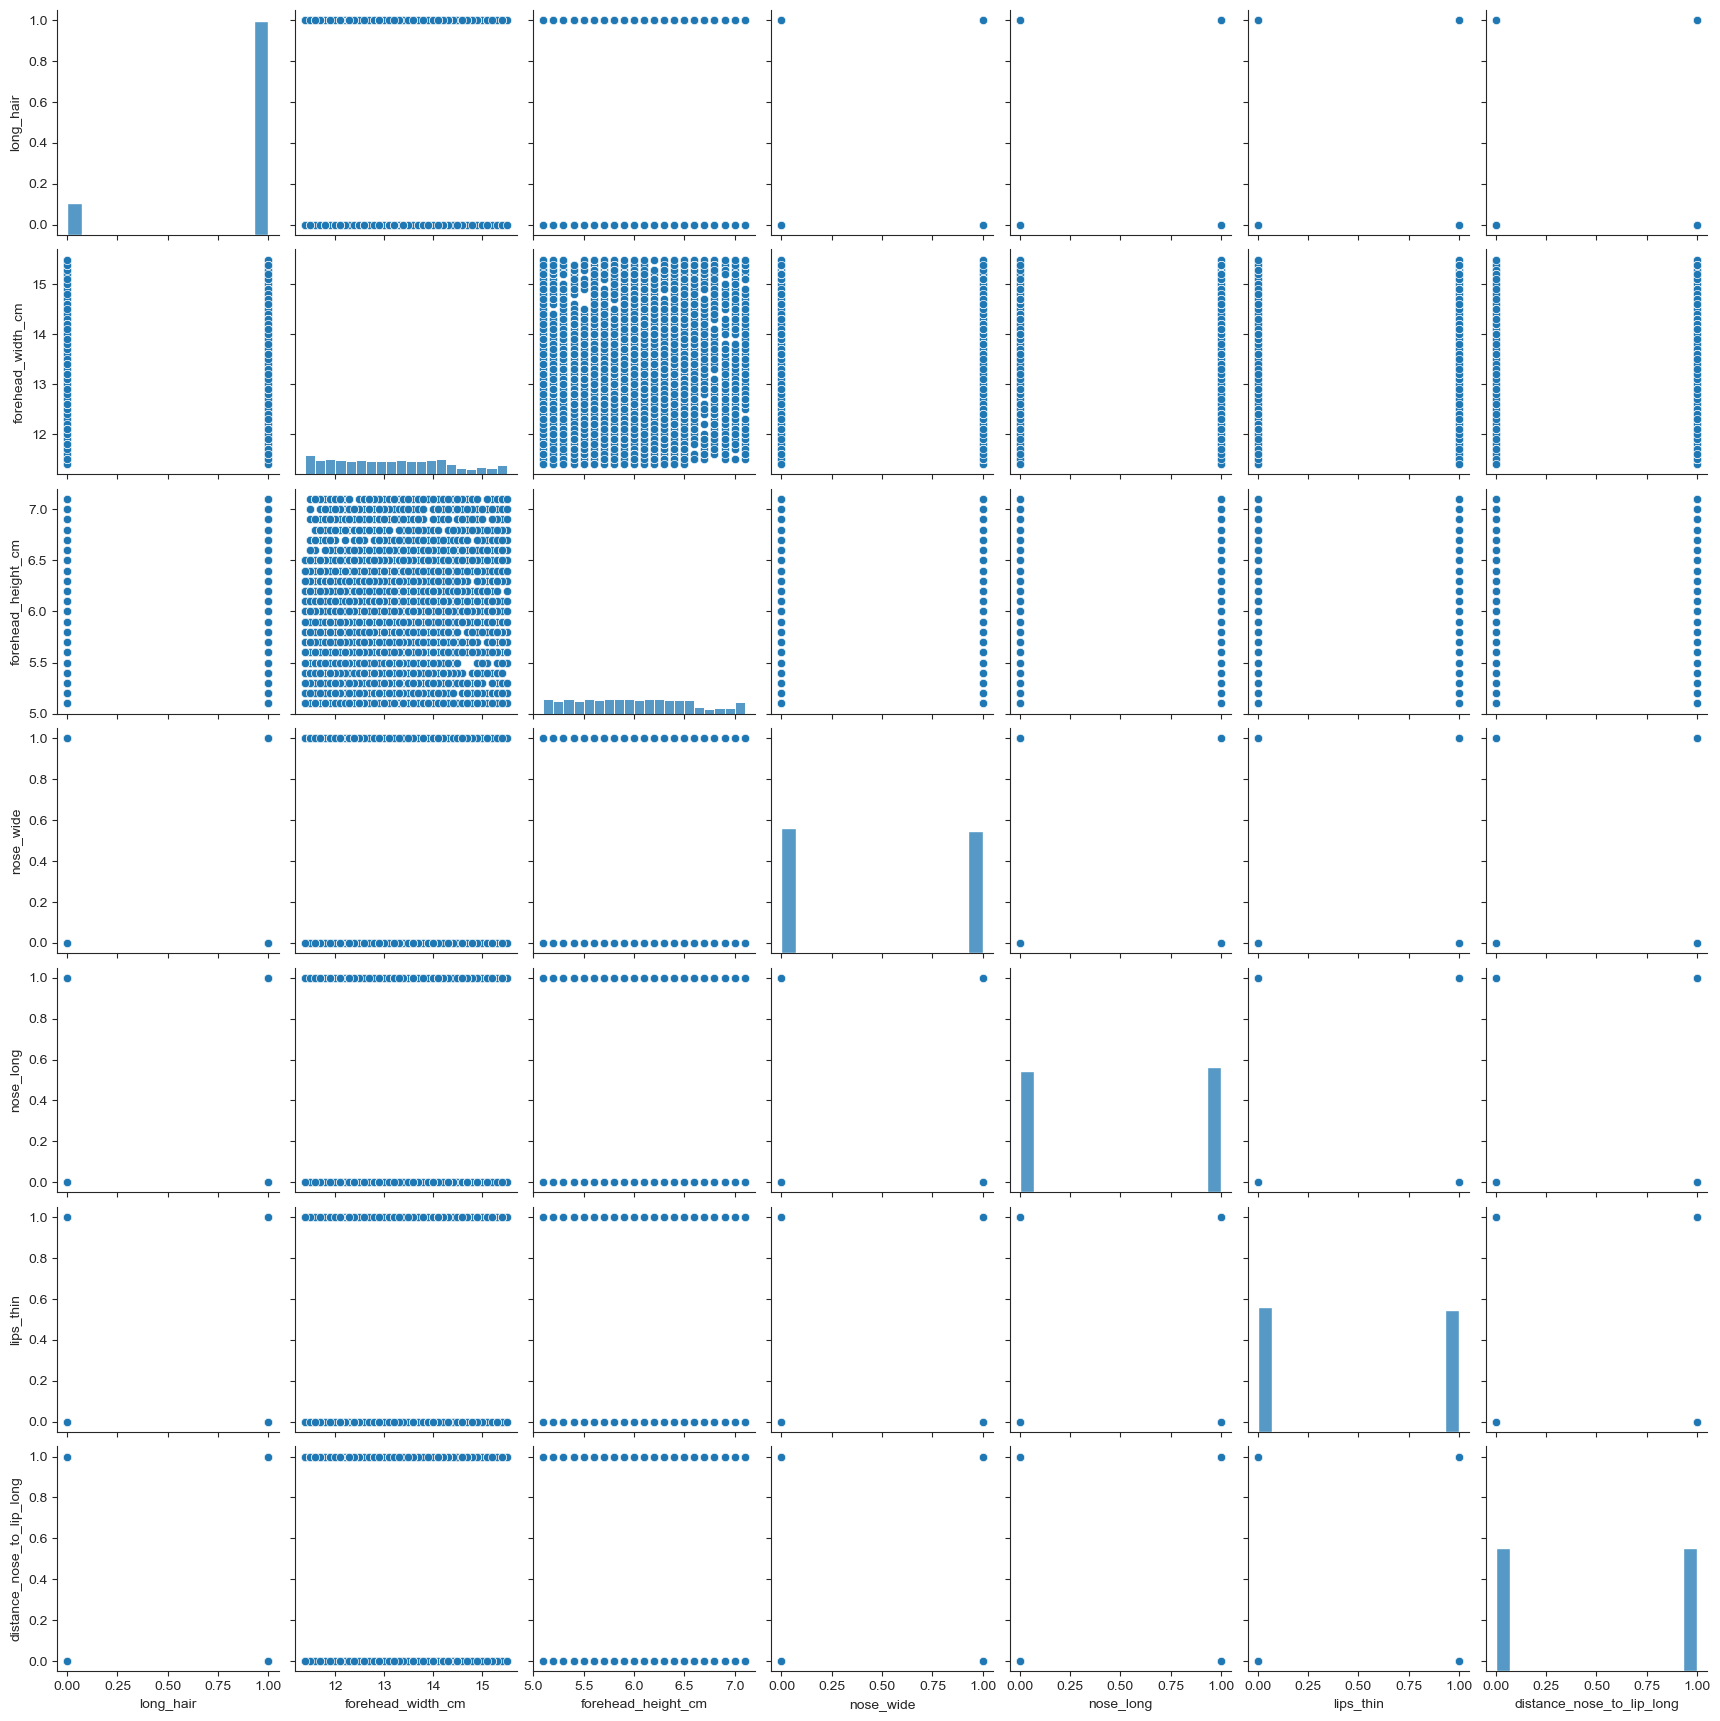

In [11]:
sns.pairplot(data=df)
plt.show()

## scatterplot showing the realtion of forehead width with gender

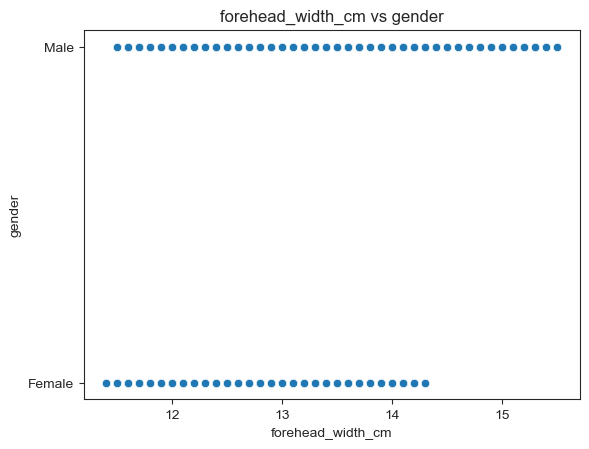

In [12]:
sns.scatterplot('forehead_width_cm','gender',data=df)
plt.title("forehead_width_cm vs gender")
plt.show()

<h1 style="font-size: 25px; color:#000000;text-align: center;
">UNIVARIATE ANALYSIS</h1>

## Histplot & kdeplot

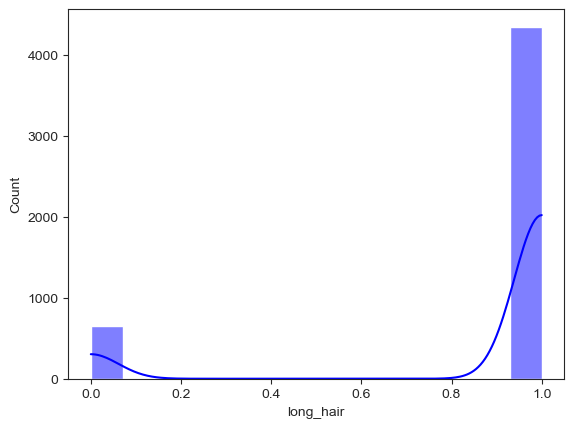

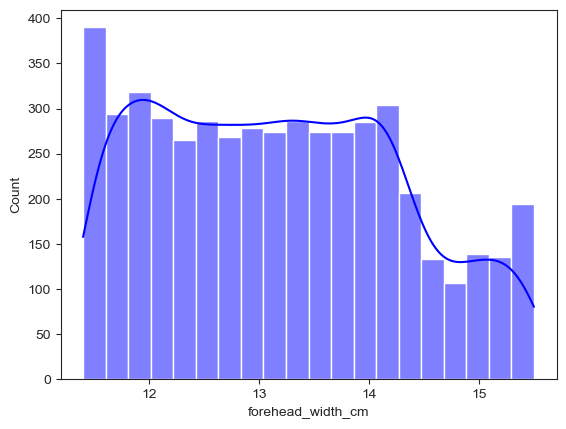

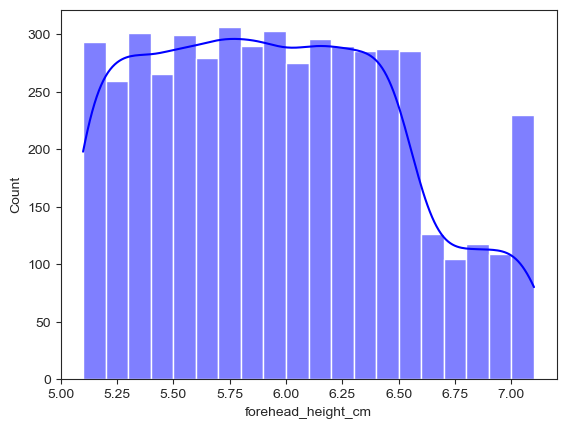

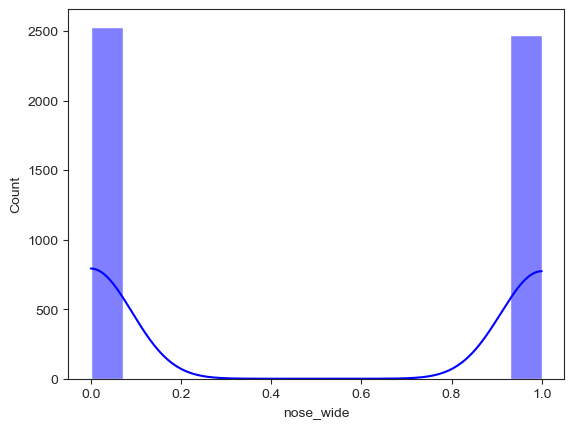

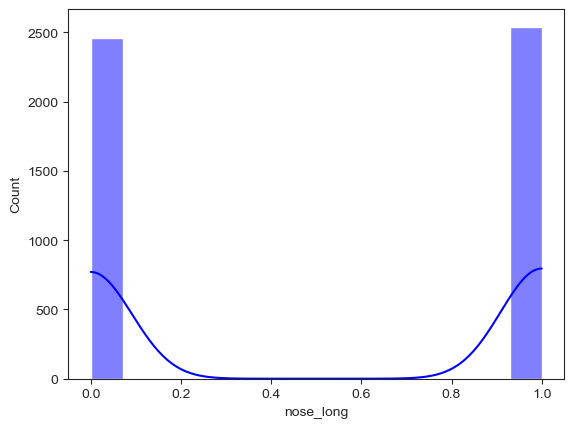

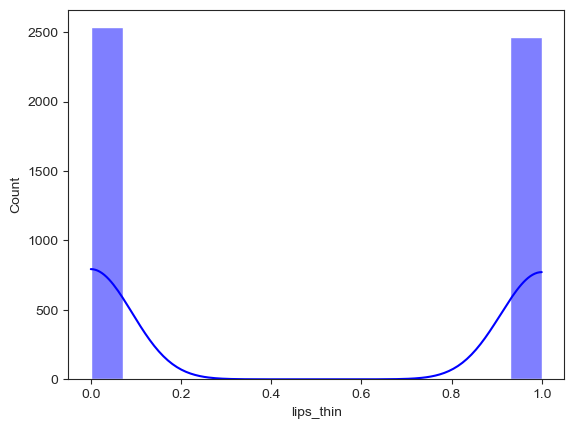

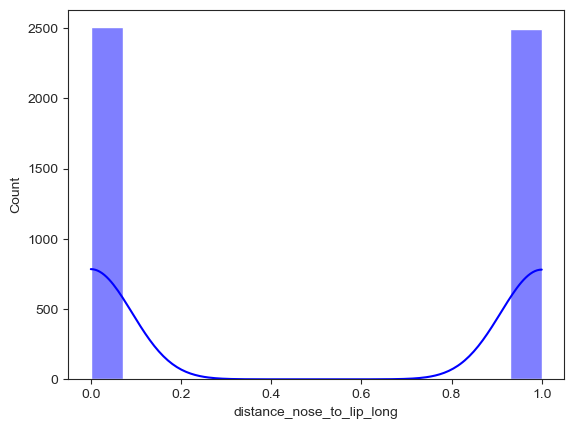

In [13]:
for i in df.columns:
    if df[i].dtype != "object":
        sns.histplot(x=df[i], kde=True, color="blue")
        plt.show()

## Plotting distplot

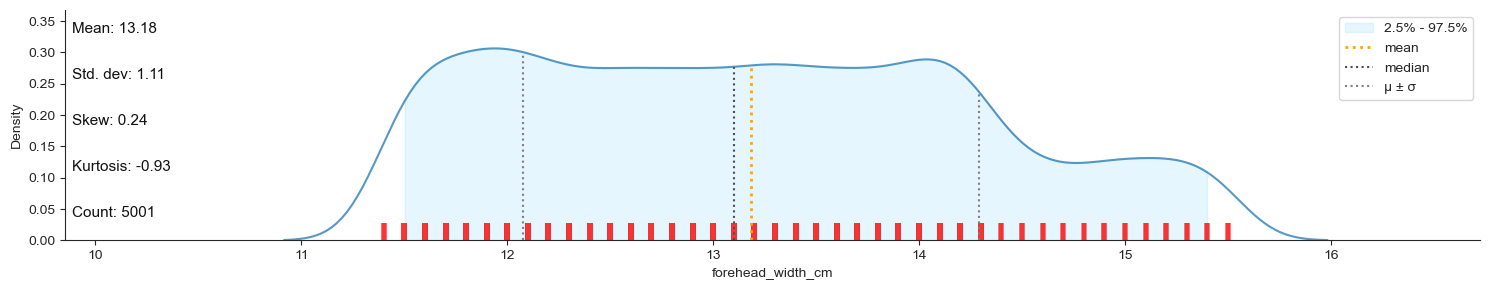

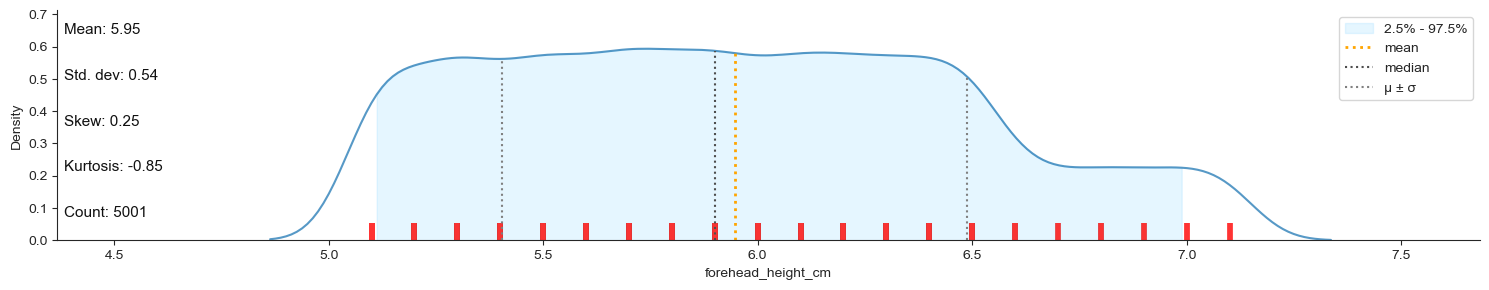

In [14]:
k.dist_plot(data=df);

## Boxplot

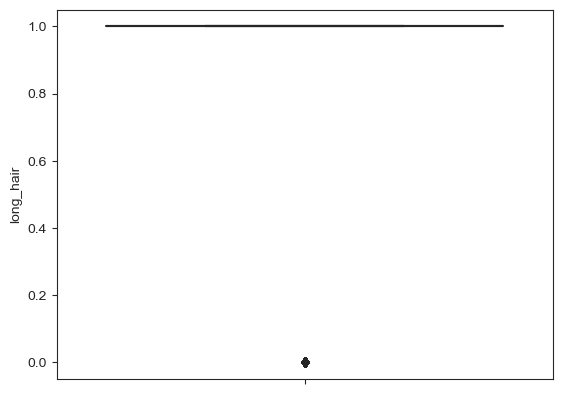

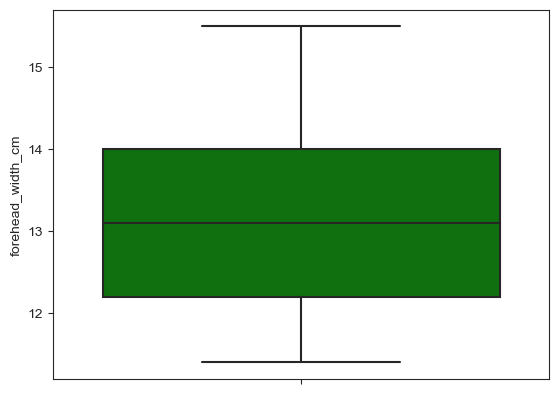

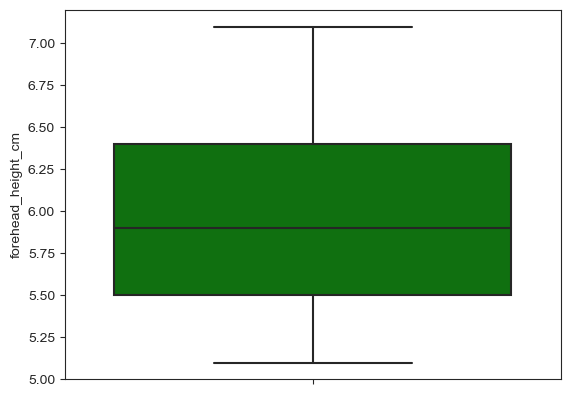

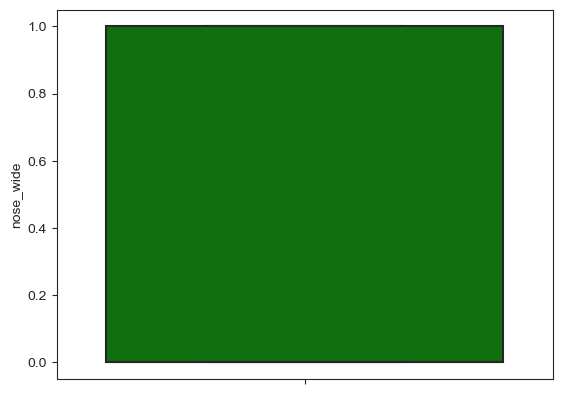

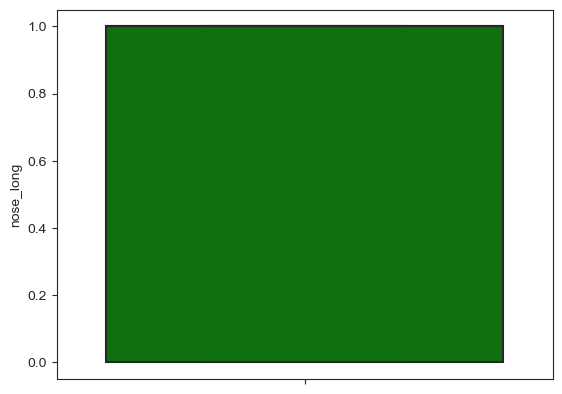

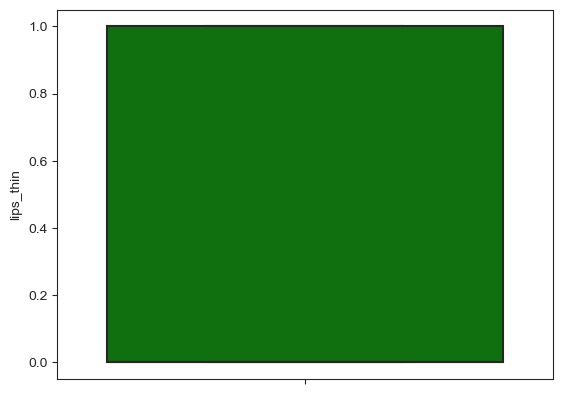

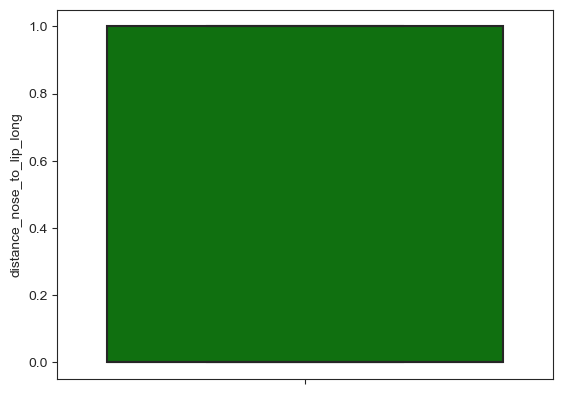

In [15]:
for i in df.columns:
    if df[i].dtype != "object":
        sns.boxplot(y=df[i],color="green")
        plt.show()

## Removing outliers

In [16]:
def outlier_limit(col):
    Q1 , Q3 = np.nanpercentile(col, [25, 75])
    IQR = Q3 - Q1
    LL = Q1 - 1.5 * IQR
    UL = Q3 + 1.5 * IQR
    return LL, UL

In [17]:
for col in df.columns:
    if df[col].dtype != "object":
        LL, UL = outlier_limit(df[col])
        df[col] = np.where((df[col] > UL) | (df[col] < LL), np.nan, df[col])

## Removing null values

In [18]:
df.dropna(inplace=True)

## Using label Encoder to change the only categorical type data gender in to numerical form

In [19]:
le=LabelEncoder()
df["gender"]=le.fit_transform(df['gender'])

## After Label Encoding  plotting heat map for checking corelation

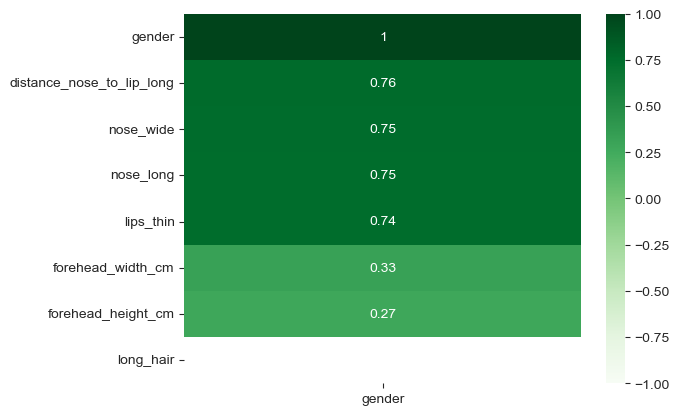

In [20]:
sns.heatmap(df.corr()[["gender"]].sort_values(by="gender", ascending=False), vmin=-1, vmax=1,annot=True, cmap="Greens");

### Then  take 'nose_wide','distance_nose_to_lip_long','nose_long','lips_thin' as x and gender  as  y for prediction purpose

In [21]:
x=df[['nose_wide','distance_nose_to_lip_long','nose_long','lips_thin']].values
y=df[['gender']].values

##  Model building & Fitting

In [22]:
sc=StandardScaler()
x= sc.fit_transform(x)

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2, random_state=0)

In [24]:
models = {
    "LogisticRegression": LogisticRegression(),
    "DecisionTreeClassifier":DecisionTreeClassifier(),
    "GradientBoostingClassifier":GradientBoostingClassifier(),
    "RandomForestClassifier":RandomForestClassifier()
}

In [25]:
for name, model in models.items():
    scores = cross_val_score(model, x,y, scoring="accuracy",cv=10,n_jobs=-1)
    print("cross validation model : {}".format(name))
    print("Mean Score: ",np.mean(scores))
    print("*"*100)

cross validation model : LogisticRegression
Mean Score:  0.9590719847449545
****************************************************************************************************
cross validation model : DecisionTreeClassifier
Mean Score:  0.9595317548598971
****************************************************************************************************
cross validation model : GradientBoostingClassifier
Mean Score:  0.9588420996874832
****************************************************************************************************
cross validation model : RandomForestClassifier
Mean Score:  0.9583823295725408
****************************************************************************************************


In [26]:
model = DecisionTreeClassifier()

In [27]:
model.fit(x_train, y_train)
print("model trained with {}".format(model))
score_train =accuracy_score (y_train, model.predict(x_train))
score_tst = accuracy_score(y_test, model.predict(x_test))
con_train = confusion_matrix(y_train, model.predict(x_train))
con_test = confusion_matrix(y_test, model.predict(x_test))
print("Model accuracy on train is:: ",score_train)
print("Model accuracy on test is:: ", score_tst)
print("confusion_matrix train is:: ", con_train)
print("confusion_matrix test is:: ", con_test)
print("Wrong Predictions made:",(y_test !=model.predict(x_test)).sum(),'/',((y_test == model.predict(x_test)).sum()+(y_test != model.predict(x_test)).sum()))
print("*"*60)

model trained with DecisionTreeClassifier()
Model accuracy on train is::  0.960620868065536
Model accuracy on test is::  0.9620689655172414
confusion_matrix train is::  [[1713   42]
 [  95 1629]]
confusion_matrix test is::  [[419  10]
 [ 23 418]]
Wrong Predictions made: 378534 / 756900
************************************************************


## predicting values and comparing with Actual

In [28]:
OUTPUT= pd.DataFrame(zip(y,model.predict(x)), columns=("ACTUAL", "PREDICTION"), dtype = int)
OUTPUT.head()

,ACTUAL,PREDICTION
0,1,1
1,0,0
2,1,1
3,1,1
4,0,1


## plotting result with graph

Model used is::  DecisionTreeClassifier()


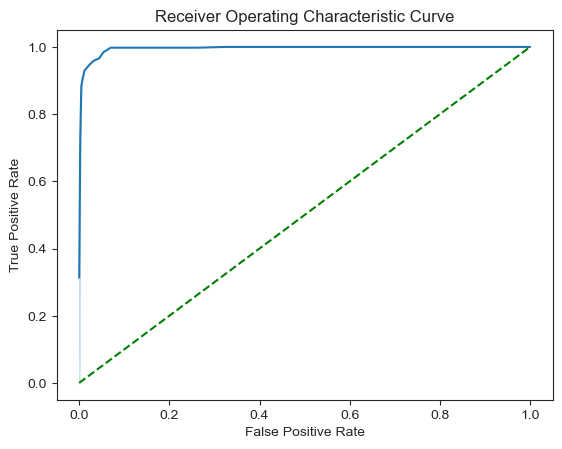

In [29]:
model.fit(x_train,y_train)
probs=model.predict_proba(x_test)
preds=probs[:,1]
fpr,tpr,threshold=metrics.roc_curve(y_test,preds)
roc_auc=metrics.auc(fpr,tpr)
print("Model used is:: ", model)
sns.lineplot(x=fpr, y=tpr)
plt.plot([0,1],[0,1],color='green',linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.show()

## Conclusion

After the Calculations and Eda analysis i found that the gender is depending upon other features  in the dataset and there is corelation is Existing in dataset.we can see the result by plotting Receiver Operating Characteristic Curve